# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [2]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the dataset
df = pd.read_csv("humidity.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


## Exploratory Data Analysis


In [4]:
# Check for missing values
df.isnull().sum()

sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64

In [5]:
# Display summary statistics
df.describe()

,sensor_id,lat,lon,pressure,temperature,humidity
count,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000
mean,2835.419842,42.679722,23.333739,94965.292500,24.754990,48.348949
std,798.018890,0.025568,0.039365,2577.210945,14.013001,20.907247
min,1764.000000,42.622000,23.240000,0.000000,-145.120000,0.000000
25%,2224.000000,42.665000,23.310000,94528.017500,20.630000,34.140000
50%,2323.000000,42.685000,23.332000,95005.480000,24.780000,48.350000
75%,3474.000000,42.694000,23.360000,95405.132500,29.870000,62.940000
max,4661.000000,42.738000,23.419000,164926.750000,61.170000,100.000000


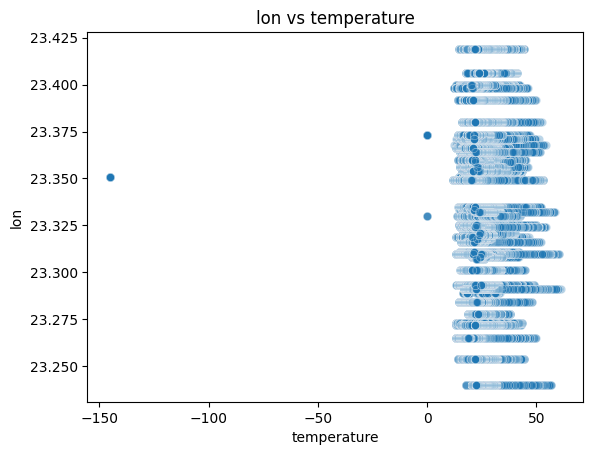

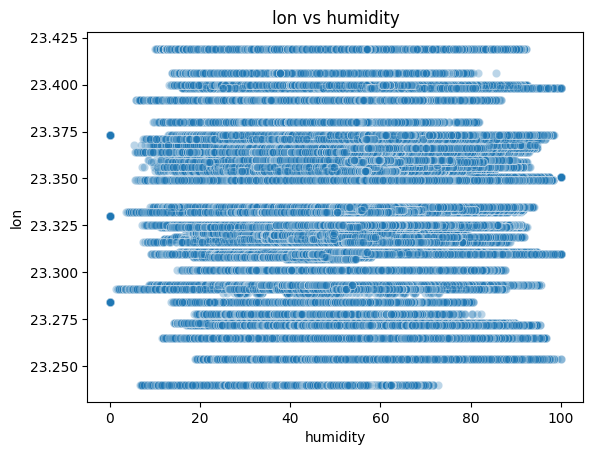

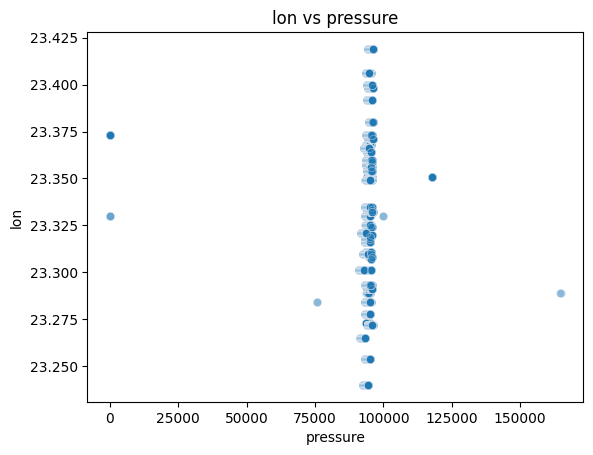

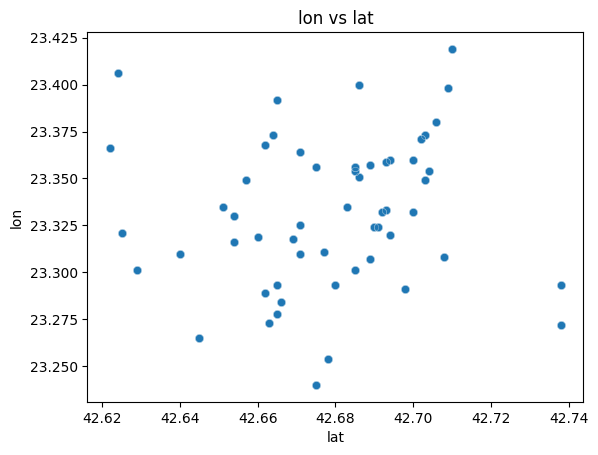

In [10]:
# Scatter plot to observe relationship
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# For temperature
# target = 'temperature'  
# features = ['humidity', 'pressure', 'lat', 'lon'] 

# for feature in features:
#     sns.scatterplot(x=df[feature], y=df[target], alpha=0.3)
#     plt.title(f'{target} vs {feature}')
#     plt.xlabel(feature)
#     plt.ylabel(target)
#     plt.show()

#Interpretation is temeprature and humidity is negatively correlated while temperature vs other features like pressure,lat and lon is not corelated is observed from scatter plot. 
 
#2. For Humidity
# target = 'humidity'
# features = ['temperature' , 'pressure', 'lat', 'lon'] 

# for feature in features:
#     sns.scatterplot(x=df[feature], y=df[target], alpha=0.3)
#     plt.title(f'{target} vs {feature}')
#     plt.xlabel(feature)
#     plt.ylabel(target)
#     plt.show()
#Interpretation is humidity vs temperature is negatively correlated while humidity vs other features like pressure,lat and lon is not related is observed from scatter plot. 

#3 For lat
# target = 'lat'
# features = ['temperature' , 'humidity','pressure', 'lon'] 

# for feature in features:
#     sns.scatterplot(x=df[feature], y=df[target], alpha=0.3)
#     plt.title(f'{target} vs {feature}')
#     plt.xlabel(feature)
#     plt.ylabel(target)
#     plt.show()
#Interpretation is lat vs other feature is not correlated is observed from scatter plot. 

#4 For lon
target = 'lon'
features = ['temperature' ,'humidity','pressure', 'lat'] 

for feature in features:
    sns.scatterplot(x=df[feature], y=df[target], alpha=0.3)
    plt.title(f'{target} vs {feature}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()
    
#Interpretation is lon vs other feature is not correlated is observed from scatter plot. 


,sensor_id,lat,lon,pressure,temperature,humidity
sensor_id,1.000000,0.093120,0.003730,-0.073571,0.085845,-0.140057
lat,0.093120,1.000000,0.036192,0.168057,0.005760,0.060758
lon,0.003730,0.036192,1.000000,0.112594,-0.017762,0.054816
pressure,-0.073571,0.168057,0.112594,1.000000,-0.547503,0.144252
temperature,0.085845,0.005760,-0.017762,-0.547503,1.000000,-0.507828
humidity,-0.140057,0.060758,0.054816,0.144252,-0.507828,1.000000


## Data Preprocessing

In [49]:
# Drop any rows with missing values
df.dropna(inplace=True)

# Define features and target
# Target variable
y = df['temperature']

# Feature variables (excluding sensor_id and temperature itself)
X = df[['lat', 'lon', 'pressure', 'humidity']]


# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

## Model Training

In [50]:
# Linear Regression
lm = LinearRegression()
model = lm.fit(X_train,y_train)
# Predict
prediction = lm.predict(X_test)


## Evaluation


In [51]:
# Evaluate model performance
print("Mean Squared Error:", mean_squared_error(y_test, prediction))
print("R-squared Score:", r2_score(y_test, prediction))

Mean Squared Error: 97.65910195612906
R-squared Score: 0.5057403104309568


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.
